In [3]:
# Import NumPy and Pandas
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer(as_frame=True)
df = data.frame

# Show the df to see how big it is
print(df)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [5]:
 # I've decided to do mean radius and mean area
features = df[['mean radius', 'mean area']]
features.head()

,mean radius,mean area
0,17.99,1001.0
1,20.57,1326.0
2,19.69,1203.0
3,11.42,386.1
4,20.29,1297.0


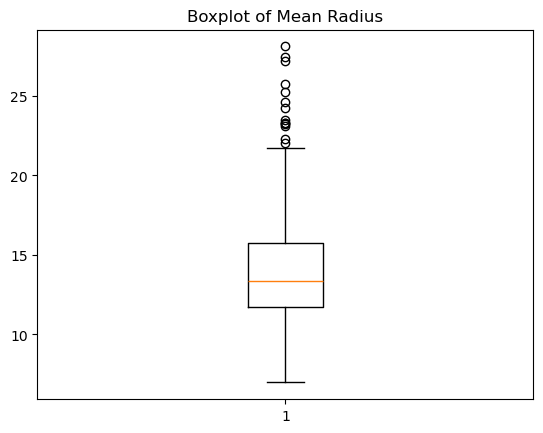

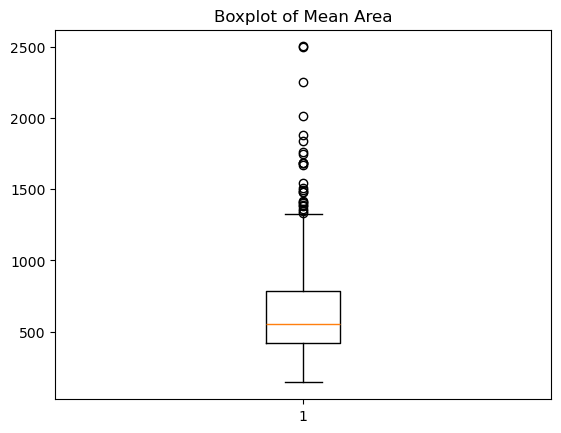

In [8]:
# Visualize the data with box plots
import matplotlib.pyplot as plt
plt.boxplot(df['mean radius'])
plt.title('Boxplot of Mean Radius')
plt.show()

plt.boxplot(df['mean area'])
plt.title('Boxplot of Mean Area')
plt.show()

In [21]:
# Detect the outliers
# First the mean radius
df['z_score_radius'] = (df['mean radius'] - df['mean radius'].mean()) / df['mean radius'].std()
df['is_outlier_radius_z'] = df['z_score_radius'].apply(lambda x: abs(x) >3)

# Now the mean area
df['z_score_area'] = (df['mean area'] - df['mean area'].mean()) / df['mean area'].std()
df['is_outlier_area_z'] = df['z_score_area'].apply(lambda x: abs(x) >3)

print(df[['mean radius', 'z_score_radius', 'is_outlier_radius_z']].head(15))

    mean radius  z_scoe_radius  is_outlier_radius_z
0         17.99       1.409052                False
1         20.57       2.269904                False
2         19.69       1.976280                False
3         11.42      -0.783118                False
4         20.29       2.176478                False
5         12.45      -0.439444                False
6         18.25       1.495804                False
7         13.71      -0.019028                False
8         13.00      -0.255929                False
9         12.46      -0.436108                False
10        16.02       0.751735                False
11        15.78       0.671655                False
12        19.17       1.802775                False
13        15.85       0.695012                False
14        13.73      -0.012355                False


In [19]:
# IQR Method for detecting outliers
# IQR Radius method
Q1_radius = df['mean radius'].quantile(0.25)
Q3_radius = df['mean radius'].quantile(0.75)
IQR_radius = Q3_radius - Q1_radius

lower_bound_radius = Q1_radius - 1.5 * IQR_radius
upper_bound_radius = Q3_radius + 1.5 * IQR_radius

df['is_outlier_radius_iqr'] = df['mean radius'].apply(
    lambda x: x < lower_bound_radius or x > upper_bound_radius)

# IQR for mean area
Q1_area = df['mean area'].quantile(0.25)
Q3_area = df['mean area'].quantile(0.75)
IQR_area = Q3_area - Q1_area

lower_bound_area = Q1_area - 1.5 * IQR_area
upper_bound_area = Q3_area + 1.5 * IQR_area

df['is_outlier_area_iqr'] = df['mean area'].apply(
    lambda x: x < lower_bound_area or x > upper_bound_area
)
# Removing the outliers
df_no_outliers = df[
    (df['is_outlier_radius_iqr'] == False) &
    (df['is_outlier_area_iqr'] == False)
]

# Replace with the median
median_radius = df['mean radius'].median()
median_area = df['mean area'].median()

df['mean radius'] = np.where(df['is_outlier_radius_iqr'], median_radius, df['mean radius'])
df['mean area'] = np.where(df['is_outlier_area_iqr'], median_area, df['mean area'])

# Feature Scaling
scaler = MinMaxScaler()
df_MinMax = scaler.fit_transform(df[['mean radius', 'mean area']])
print(df_MinMax[:5])

[[0.77972944 0.85621568]
 [0.96246193 0.40698952]
 [0.90013457 0.40698952]
 [0.31439904 0.24223665]
 [0.9426305  0.40698952]]


In [20]:
# Standardization
scaler_std = StandardScaler()
df_standard = scaler_std.fit_transform(df[['mean radius', 'mean area']])
print(df_standard[:5])

[[ 1.41029162  2.18586512]
 [ 2.27190104 -0.03134053]
 [ 1.97801875 -0.03134053]
 [-0.7838068  -0.84449663]
 [ 2.17839304 -0.03134053]]


In [ ]:
# Reflection
# Outliers and scaling are important steps when working with data. Outliers are the values that don’t really fit with the rest of the numbers.
# They can throw off calculations like the mean and standard deviation, which makes the data less reliable. 
# By finding and either removing or replacing outliers, the dataset becomes more consistent and easier to work with.
# Scaling is also important because different features can be on completely different ranges. 
# For example, one column might have values in the hundreds while another column only has values between 0 and 1. 
# Without scaling, the larger numbers can take over and make the smaller ones seem less important. 
# Min-Max scaling puts everything between 0 and 1, while Standardization centers the data around zero with a spread of one. 
# Both methods make comparisons more fair and help keep the analysis balanced. 
# Overall, handling outliers and scaling keeps the data cleaner and more useful.